In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [3]:
df = pd.read_csv("/Users/angelalu/Desktop/pseudo_map/raw_data/df_100.csv")
df.head()

,tool,strain,length,flag,position,threshold
0,sniffles,LP_J,1725,FP,6055203,100
1,sniffles,LP_J,34582728,FP,17098523,100
2,sniffles,LP_J,48,FP,17201451,100
3,sniffles,LP_J,35,FP,17291187,100
4,sniffles,LP_J,34,FP,17805736,100


In [4]:
df.groupby('tool').strain.count().reset_index()
print(df)

               tool strain    length flag  position  threshold
0          sniffles   LP_J      1725   FP   6055203        100
1          sniffles   LP_J  34582728   FP  17098523        100
2          sniffles   LP_J        48   FP  17201451        100
3          sniffles   LP_J        35   FP  17291187        100
4          sniffles   LP_J        34   FP  17805736        100
...             ...    ...       ...  ...       ...        ...
842316  breakdancer  AKR_J      1656   TP  60878727        100
842317  breakdancer  AKR_J      8753   TP  60925345        100
842318  breakdancer  AKR_J       347   TP  61025605        100
842319  breakdancer  AKR_J       308   TP  61026675        100
842320  breakdancer  AKR_J       637   TP  61114244        100

[842321 rows x 6 columns]


In [5]:
#creates an array that lists each unique tool
df.tool.unique()


array(['sniffles', 'smoove', 'platypus', 'pindel', 'mistrvar',
       'lumpexpress', 'indelminer', 'gridss', 'gasv', 'delly', 'clever',
       'breakdancer'], dtype=object)

In [6]:
#ID type of flag
df.flag.unique()

array(['FP', 'TP'], dtype=object)

In [7]:
#separate dataset based on length (50-100 bp, 100-500 bp, 500-1000 bp, 1000+ bp)
df50_100 = df.loc[(df.length>0)&(df.length<100)]
print(df50_100)


            tool strain  length flag  position  threshold
2       sniffles   LP_J      48   FP  17201451        100
3       sniffles   LP_J      35   FP  17291187        100
4       sniffles   LP_J      34   FP  17805736        100
5       sniffles   LP_J      37   FP  18086146        100
6       sniffles   LP_J      47   FP  18253183        100
...          ...    ...     ...  ...       ...        ...
841742    clever  AKR_J      61   TP  59480489        100
841743    clever  AKR_J      28   TP  59505519        100
841755    clever  AKR_J      64   TP  60241387        100
841760    clever  AKR_J      96   TP  60470076        100
841784    clever  AKR_J      30   TP  61192336        100

[747796 rows x 6 columns]


In [8]:
df100_500 = df.loc[(df.length>100)&(df.length<500)]
print(df100_500)


               tool strain  length flag  position  threshold
19         sniffles   LP_J     470   FP  23214172        100
26         sniffles   LP_J     184   FP  31708115        100
47         sniffles   LP_J     313   FP  55518789        100
56         sniffles   LP_J     376   FP  60529088        100
59         sniffles   LP_J     166   FP  60801519        100
...             ...    ...     ...  ...       ...        ...
842307  breakdancer  AKR_J     318   TP  60616958        100
842313  breakdancer  AKR_J     325   TP  60744157        100
842314  breakdancer  AKR_J     296   TP  60747562        100
842318  breakdancer  AKR_J     347   TP  61025605        100
842319  breakdancer  AKR_J     308   TP  61026675        100

[25311 rows x 6 columns]


In [9]:
df500_1000 = df.loc[(df.length>500)&(df.length<1000)]
print(df500_1000)

               tool strain  length flag  position  threshold
27         sniffles   LP_J     777   FP  36762558        100
68         sniffles   LP_J     618   TP  18396654        100
77         sniffles   LP_J     502   TP  22136094        100
84         sniffles   LP_J     709   TP  25931984        100
102        sniffles   LP_J     524   TP  31997429        100
...             ...    ...     ...  ...       ...        ...
842300  breakdancer  AKR_J     651   TP  60056235        100
842310  breakdancer  AKR_J     591   TP  60657132        100
842311  breakdancer  AKR_J     596   TP  60691705        100
842315  breakdancer  AKR_J     693   TP  60828845        100
842320  breakdancer  AKR_J     637   TP  61114244        100

[3727 rows x 6 columns]


In [10]:
df1000 = df.loc[(df.length>1000)]
print(df1000)

               tool strain    length flag  position  threshold
0          sniffles   LP_J      1725   FP   6055203        100
1          sniffles   LP_J  34582728   FP  17098523        100
7          sniffles   LP_J      4150   FP  18920153        100
16         sniffles   LP_J      1279   FP  23208971        100
18         sniffles   LP_J      3143   FP  23210606        100
...             ...    ...       ...  ...       ...        ...
842308  breakdancer  AKR_J      1135   TP  60641248        100
842309  breakdancer  AKR_J      6504   TP  60643783        100
842312  breakdancer  AKR_J      1126   TP  60703684        100
842316  breakdancer  AKR_J      1656   TP  60878727        100
842317  breakdancer  AKR_J      8753   TP  60925345        100

[64859 rows x 6 columns]


In [11]:
#group each tool by flag count

len50_100 = df50_100.groupby(['tool', 'flag']).strain.count().unstack(level=-1)
#len50_100['threshold'] = np.zeros(11)+100
#after level in parenthesis, add "fill_value=0" to change NaN --> 0

#add columns for TN and FN (dataset contains none of each?)
len50_100['TN'] = np.zeros(11)+0
len50_100['FN'] = np.zeros(11)+0

len50_100.rename(columns={'flag tool': 'tool'})

print(len50_100)

flag               FP     TP   TN   FN
tool                                  
clever         6233.0  176.0  0.0  0.0
delly          2830.0   90.0  0.0  0.0
gasv           1582.0    NaN  0.0  0.0
gridss        12833.0  113.0  0.0  0.0
indelminer    68147.0   42.0  0.0  0.0
lumpexpress    1498.0   99.0  0.0  0.0
mistrvar      39536.0  155.0  0.0  0.0
pindel       495815.0  201.0  0.0  0.0
platypus     117573.0   72.0  0.0  0.0
smoove          301.0  100.0  0.0  0.0
sniffles        359.0   41.0  0.0  0.0


In [12]:
def calculate_sensitivity(row):
    return row['TP']/(row['TP'] + row['FN'])
len50_100['sensitivity'] = len50_100.apply(calculate_sensitivity, axis=1)

def calculate_specificity(row):
    return row['TN']/(row['TN'] + row['FP'])
len50_100['specificity'] = len50_100.apply(calculate_specificity, axis=1)

def calculate_precision(row):
    return row['TP']/(row['TP'] + row['FP'])
len50_100['precision'] = len50_100.apply(calculate_precision, axis =1)

def f_score(row):
    return (2 * row['precision'] * row['sensitivity'])/(row['precision'] + row['sensitivity'])
len50_100['f_score'] = len50_100.apply(f_score, axis=1)

#column for length added
len50_100['length'] = '50_100'

print(len50_100)

flag               FP     TP   TN   FN  sensitivity  specificity  precision  \
tool                                                                          
clever         6233.0  176.0  0.0  0.0          1.0          0.0   0.027461   
delly          2830.0   90.0  0.0  0.0          1.0          0.0   0.030822   
gasv           1582.0    NaN  0.0  0.0          NaN          0.0        NaN   
gridss        12833.0  113.0  0.0  0.0          1.0          0.0   0.008729   
indelminer    68147.0   42.0  0.0  0.0          1.0          0.0   0.000616   
lumpexpress    1498.0   99.0  0.0  0.0          1.0          0.0   0.061991   
mistrvar      39536.0  155.0  0.0  0.0          1.0          0.0   0.003905   
pindel       495815.0  201.0  0.0  0.0          1.0          0.0   0.000405   
platypus     117573.0   72.0  0.0  0.0          1.0          0.0   0.000612   
smoove          301.0  100.0  0.0  0.0          1.0          0.0   0.249377   
sniffles        359.0   41.0  0.0  0.0          1.0 

In [13]:
len100_500 = df100_500.groupby(['tool', 'flag']).strain.count().unstack(level=-1)
len100_500['TN'] = np.zeros(11)+0
len100_500['FN'] = np.zeros(11)+0

print(len100_500)

flag           FP    TP   TN   FN
tool                             
breakdancer  1008   774  0.0  0.0
clever       4438  1344  0.0  0.0
delly         277  1021  0.0  0.0
gasv         9084   135  0.0  0.0
gridss        335  1123  0.0  0.0
indelminer     92   368  0.0  0.0
lumpexpress   118   996  0.0  0.0
mistrvar      351   568  0.0  0.0
pindel        574  1033  0.0  0.0
smoove        124  1018  0.0  0.0
sniffles       35   495  0.0  0.0


In [24]:
def calculate_sensitivity(row):
    return row['TP']/(row['TP'] + row['FN'])
len100_500['sensitivity'] = len100_500.apply(calculate_sensitivity, axis=1)

def calculate_specificity(row):
    return row['TN']/(row['TN'] + row['FP'])
len100_500['specificity'] = len100_500.apply(calculate_specificity, axis=1)

def calculate_precision(row):
    return row['TP']/(row['TP'] + row['FP'])
len100_500['precision'] = len100_500.apply(calculate_precision, axis =1)

def f_score(row):
    return (2 * row['precision'] * row['sensitivity'])/(row['precision'] + row['sensitivity'])
len100_500['f_score'] = len100_500.apply(f_score, axis=1)

#column for length added
len100_500['length'] = '100_500'

print(len100_500)

flag           FP    TP   TN   FN  sensitivity  specificity  precision  \
tool                                                                     
breakdancer  1008   774  0.0  0.0          1.0          0.0   0.434343   
clever       4438  1344  0.0  0.0          1.0          0.0   0.232446   
delly         277  1021  0.0  0.0          1.0          0.0   0.786595   
gasv         9084   135  0.0  0.0          1.0          0.0   0.014644   
gridss        335  1123  0.0  0.0          1.0          0.0   0.770233   
indelminer     92   368  0.0  0.0          1.0          0.0   0.800000   
lumpexpress   118   996  0.0  0.0          1.0          0.0   0.894075   
mistrvar      351   568  0.0  0.0          1.0          0.0   0.618063   
pindel        574  1033  0.0  0.0          1.0          0.0   0.642813   
smoove        124  1018  0.0  0.0          1.0          0.0   0.891419   
sniffles       35   495  0.0  0.0          1.0          0.0   0.933962   

flag          f_score   length  
tool

In [15]:
len500_1000 = df500_1000.groupby(['tool', 'flag']).strain.count().unstack(level=-1)
len500_1000['TN'] = np.zeros(11)+0
len500_1000['FN'] = np.zeros(11)+0

print(len500_1000)

flag           FP   TP   TN   FN
tool                            
breakdancer   116  256  0.0  0.0
clever         37  220  0.0  0.0
delly         177  256  0.0  0.0
gasv         1142  135  0.0  0.0
gridss        121  221  0.0  0.0
indelminer     24   16  0.0  0.0
lumpexpress   101  221  0.0  0.0
mistrvar        9   13  0.0  0.0
pindel         60  212  0.0  0.0
smoove         92  219  0.0  0.0
sniffles       10   69  0.0  0.0


In [25]:
def calculate_sensitivity(row):
    return row['TP']/(row['TP'] + row['FN'])
len500_1000['sensitivity'] = len500_1000.apply(calculate_sensitivity, axis=1)

def calculate_specificity(row):
    return row['TN']/(row['TN'] + row['FP'])
len500_1000['specificity'] = len500_1000.apply(calculate_specificity, axis=1)

def calculate_precision(row):
    return row['TP']/(row['TP'] + row['FP'])
len500_1000['precision'] = len500_1000.apply(calculate_precision, axis =1)

def f_score(row):
    return (2 * row['precision'] * row['sensitivity'])/(row['precision'] + row['sensitivity'])
len500_1000['f_score'] = len500_1000.apply(f_score, axis=1)

#column for length added
len500_1000['length'] = '500_1000'

print(len500_1000)

flag           FP   TP   TN   FN  sensitivity  specificity  precision  \
tool                                                                    
breakdancer   116  256  0.0  0.0          1.0          0.0   0.688172   
clever         37  220  0.0  0.0          1.0          0.0   0.856031   
delly         177  256  0.0  0.0          1.0          0.0   0.591224   
gasv         1142  135  0.0  0.0          1.0          0.0   0.105717   
gridss        121  221  0.0  0.0          1.0          0.0   0.646199   
indelminer     24   16  0.0  0.0          1.0          0.0   0.400000   
lumpexpress   101  221  0.0  0.0          1.0          0.0   0.686335   
mistrvar        9   13  0.0  0.0          1.0          0.0   0.590909   
pindel         60  212  0.0  0.0          1.0          0.0   0.779412   
smoove         92  219  0.0  0.0          1.0          0.0   0.704180   
sniffles       10   69  0.0  0.0          1.0          0.0   0.873418   

flag          f_score    length  
tool            

In [17]:
len1000 = df1000.groupby(['tool', 'flag']).strain.count().unstack(level=-1)
len1000['TN'] = np.zeros(9)+0
len1000['FN'] = np.zeros(9)+0

print(len1000)

flag            FP   TP   TN   FN
tool                             
breakdancer    339  568  0.0  0.0
clever          47  482  0.0  0.0
delly          532  628  0.0  0.0
gasv         58829  239  0.0  0.0
gridss         493  579  0.0  0.0
indelminer      13   37  0.0  0.0
lumpexpress    328  604  0.0  0.0
smoove         251  592  0.0  0.0
sniffles        46  252  0.0  0.0


In [29]:
def calculate_sensitivity(row):
    return row['TP']/(row['TP'] + row['FN'])
len1000['sensitivity'] = len1000.apply(calculate_sensitivity, axis=1)

def calculate_specificity(row):
    return row['TN']/(row['TN'] + row['FP'])
len1000['specificity'] = len1000.apply(calculate_specificity, axis=1)

def calculate_precision(row):
    return row['TP']/(row['TP'] + row['FP'])
len1000['precision'] = len1000.apply(calculate_precision, axis =1)

def f_score(row):
    return (2 * row['precision'] * row['sensitivity'])/(row['precision'] + row['sensitivity'])
len1000['f_score'] = len1000.apply(f_score, axis=1)

#column for length added
len1000['length'] = '1000_'

print(len1000)

flag            FP   TP   TN   FN  sensitivity  specificity  precision  \
tool                                                                     
breakdancer    339  568  0.0  0.0          1.0          0.0   0.626240   
clever          47  482  0.0  0.0          1.0          0.0   0.911153   
delly          532  628  0.0  0.0          1.0          0.0   0.541379   
gasv         58829  239  0.0  0.0          1.0          0.0   0.004046   
gridss         493  579  0.0  0.0          1.0          0.0   0.540112   
indelminer      13   37  0.0  0.0          1.0          0.0   0.740000   
lumpexpress    328  604  0.0  0.0          1.0          0.0   0.648069   
smoove         251  592  0.0  0.0          1.0          0.0   0.702254   
sniffles        46  252  0.0  0.0          1.0          0.0   0.845638   

flag          f_score length  
tool                          
breakdancer  0.770169  1000_  
clever       0.953511  1000_  
delly        0.702461  1000_  
gasv         0.008060  1000_  

In [32]:
all_lengths = pd.concat([len50_100, len100_500, len500_1000, len1000], axis=0).reset_index()
all_lengths.tail(41)

flag,tool,FP,TP,TN,FN,sensitivity,specificity,precision,f_score,length
1,delly,2830.0,90.0,0.0,0.0,1.0,0.0,0.030822,0.059801,50_100
2,gasv,1582.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,50_100
3,gridss,12833.0,113.0,0.0,0.0,1.0,0.0,0.008729,0.017306,50_100
4,indelminer,68147.0,42.0,0.0,0.0,1.0,0.0,0.000616,0.001231,50_100
5,lumpexpress,1498.0,99.0,0.0,0.0,1.0,0.0,0.061991,0.116745,50_100
6,mistrvar,39536.0,155.0,0.0,0.0,1.0,0.0,0.003905,0.007780,50_100
7,pindel,495815.0,201.0,0.0,0.0,1.0,0.0,0.000405,0.000810,50_100
8,platypus,117573.0,72.0,0.0,0.0,1.0,0.0,0.000612,0.001223,50_100
9,smoove,301.0,100.0,0.0,0.0,1.0,0.0,0.249377,0.399202,50_100
10,sniffles,359.0,41.0,0.0,0.0,1.0,0.0,0.102500,0.185941,50_100


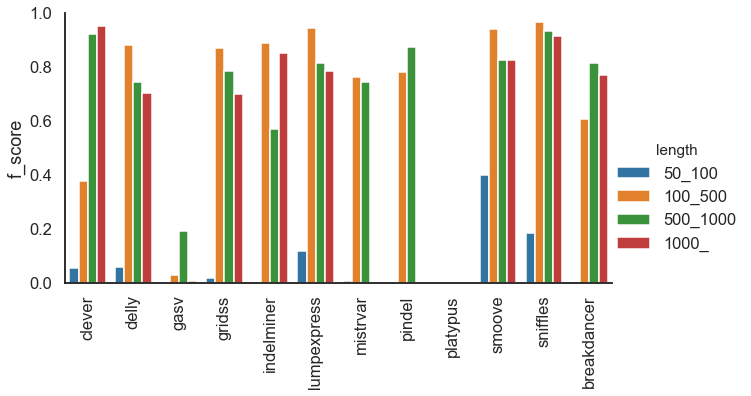

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="tool", y="f_score",data=all_lengths,hue='length',aspect=1.8,kind='bar')
g.set_xticklabels(rotation=90)
g.set(ylim=(0, 1))
g.set(xlabel='', ylabel='f_score')
g=sns.despine()
plt.show(g)


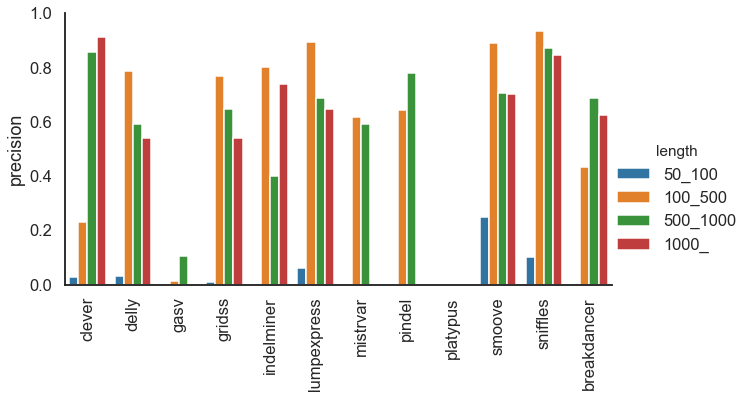

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="tool", y="precision",data=all_lengths,hue='length',aspect=1.8,kind='bar')
g.set_xticklabels(rotation=90)
g.set(ylim=(0, 1))
g.set(xlabel='', ylabel='precision')
g=sns.despine()
plt.show(g)